In [75]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

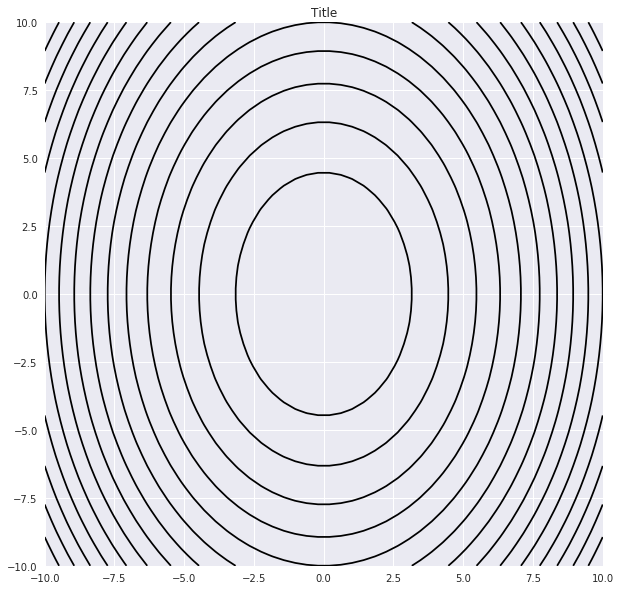

In [76]:
from plot import plot

plot(gamma=2);

In [77]:
data = np.load('homework/data.data')
plot(gamma=2, points=data)

FileNotFoundError: [Errno 2] No such file or directory: 'homework/data.data'

In [92]:
import pandas as pd

parameters = pd.read_csv('../parameters.csv', sep=';')
parameters.head()

,x_0,x_1,gama
0,0.168251,0.257792,8.0
1,0.196249,0.396799,2.0
2,0.317480,0.073995,7.0
3,0.316429,0.684096,5.0
4,0.217563,0.402388,3.0


In [93]:
a = None
for index, row in parameters.iterrows():
    a = row
    break
x_0, x_1, gama = a
x_0, x_1, gama

(0.1682513, 0.25779225, 8.0)

In [100]:
del data
data = pd.read_csv('../results.csv', sep=';')
data.head()

,method,line_search,id_parameter,alpha,beta,step,x_0,x_1,error
0,GradientDescent,exact,0,NaN,NaN,0,0.168251,0.257792,4.111424
1,GradientDescent,exact,0,NaN,NaN,1,0.002086,0.225968,0.679750
2,GradientDescent,exact,0,NaN,NaN,2,-0.014012,0.008022,0.337141
3,GradientDescent,exact,0,NaN,NaN,3,-0.000174,0.007032,0.021503
4,GradientDescent,exact,0,NaN,NaN,4,0.000926,0.001470,0.022649


In [101]:
data[['method', 'line_search']].drop_duplicates()

,method,line_search
0,GradientDescent,exact
11,SteepestDescent,exact
17,GradientDescent,backtracking
59390,SteepestDescent,backtracking
94475,Newton,backtracking


In [102]:
filter_method = lambda method, line_search: data[(data['method'] == method) & (data['line_search'] == line_search)]

#filtered = filter_method('GradientDescent', 'backtracking')
filtered = filter_method('SteepestDescent', 'backtracking')
#filtered = filter_method('Newton', 'backtracking')
filtered.head()

,method,line_search,id_parameter,alpha,beta,step,x_0,x_1,error
59390,SteepestDescent,backtracking,0,0.01,0.01,0,0.168251,0.257792,4.038031
59391,SteepestDescent,backtracking,0,0.01,0.01,1,0.127871,0.257792,3.068904
59392,SteepestDescent,backtracking,0,0.01,0.01,2,0.097182,0.257792,2.332367
59393,SteepestDescent,backtracking,0,0.01,0.01,3,0.073858,0.257792,1.772599
59394,SteepestDescent,backtracking,0,0.01,0.01,4,0.056132,0.257792,1.347175


[5, 61]


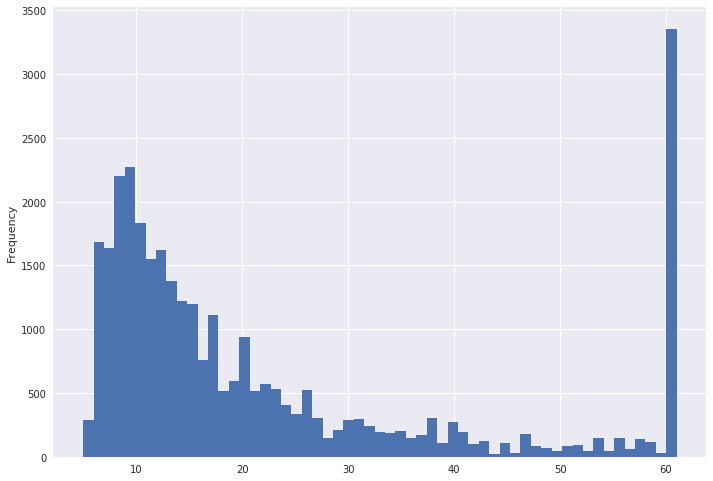

In [103]:
group_by = filtered.groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()

steps = group_by.sort_values('step')['step']
steps.plot.hist(steps.max() - steps.min() + 1)

print([steps.min(), steps.max()])

In [104]:
group_by2 = filtered[data['id_parameter']==5].groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
#group_by2 = filtered.groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
a = group_by2.unstack()['step']#[['alpha', 'beta', 'step']]
#del a['method']
a = a.reset_index(['method', 'line_search', 'id_parameter'])
del a['method']
del a['line_search']
del a['id_parameter']

a
#group_by2
#group_by2.reset_index('alpha')['alpha'].plot()

/home/paulo/git/otimizacao/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


beta,0.01,0.03225,0.0545,0.07675,0.099,0.12124999999999997,0.14350000000000002,0.16575,0.188,0.21025,...,0.6775,0.69975,0.722,0.74425,0.7665,0.78875,0.8109999999999999,0.8332499999999999,0.8554999999999999,0.8777499999999999
alpha,,,,,,,,,,,,,,,,,,,,,
0.01000,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,61,61,33,61,40
0.02225,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,61,21,33,61,40
0.03450,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,61,21,33,61,40
0.04675,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,61,21,33,61,40
0.05900,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,61,21,33,61,40
0.07125,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,15,21,33,21,40
0.08350,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,15,21,33,21,40
0.09575,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,15,21,33,21,40
0.10800,61,61,61,61,58,45,37,30,26,22,...,13,15,19,25,36,15,21,33,21,40


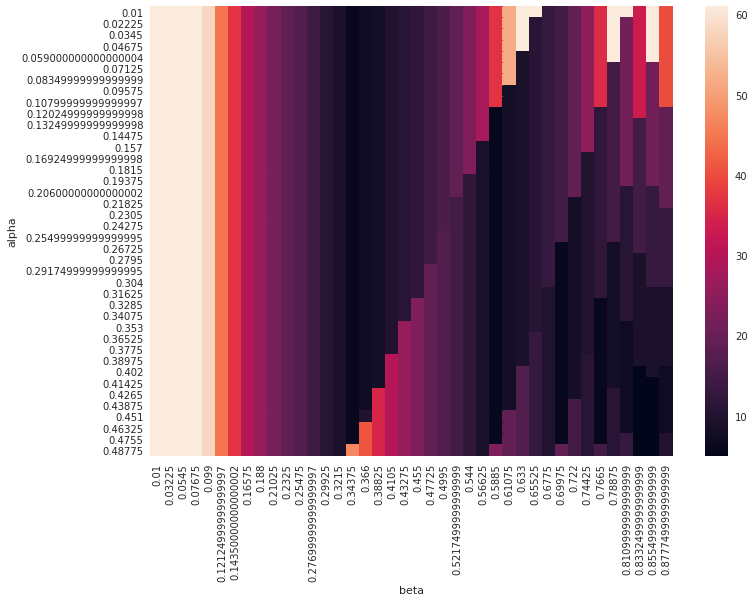

In [105]:
#group_by.sort_values('step')['step'].plot.hist(61)
#group_by[group_by['method']]
sns.heatmap(a)

In [73]:
group_by3 = filtered.groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
group_by3.reset_index('id_parameter').sort_values(['step', 'id_parameter'])

id_parameter  step  x_0  x_1
method line_search            alpha   beta                                  
Newton BacktrackingLineSearch 0.01000 0.010000             0     2    2    2
                                      0.021125             0     2    2    2
                                      0.032250             0     2    2    2
                                      0.043375             0     2    2    2
                                      0.054500             0     2    2    2
                                      0.065625             0     2    2    2
                                      0.076750             0     2    2    2
                                      0.087875             0     2    2    2
                                      0.099000             0     2    2    2
                                      0.110125             0     2    2    2
                                      0.121250             0     2    2    2
                                      0.132375             0     2    2    2
                                      0.143500             0     2    2    2
                                      0.154625             0     2    2    2
                                      0.165750             0     2    2    2
                                      0.176875             0     2    2    2
                                      0.188000             0     2    2    2
                                      0.199125             0     2    2    2
                                      0.210250             0     2    2    2
                                      0.221375             0     2    2    2
                                      0.232500             0     2    2    2
                                      0.243625             0     2    2    2
                                      0.254750             0     2    2    2
                                      0.265875             0     2    2    2
                                      0.277000             0     2    2    2
                                      0.288125             0     2    2    2
                                      0.299250             0     2    2    2
                                      0.310375             0     2    2    2
                                      0.321500             0     2    2    2
                                      0.332625             0     2    2    2
...                                                      ...   ...  ...  ...
                              0.48775 0.566250            19     2    2    2
                                      0.577375            19     2    2    2
                                      0.588500            19     2    2    2
                                      0.599625            19     2    2    2
                                      0.610750            19     2    2    2
                                      0.621875            19     2    2    2
                                      0.633000            19     2    2    2
                                      0.644125            19     2    2    2
                                      0.655250            19     2    2    2
                                      0.666375            19     2    2    2
                                      0.677500            19     2    2    2
                                      0.688625            19     2    2    2
                                      0.699750            19     2    2    2
                                      0.710875            19     2    2    2
                                      0.722000            19     2    2    2
                                      0.733125            19     2    2    2
                                      0.744250            19     2    2    2
                                      0.755375            19     2    2    2
                                      0.766500            19     2    2    2
                                      0.7776